In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import skew
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('Irisdataset.csv')

In [3]:
raw_data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,Class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
raw_data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
raw_data

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data = raw_data.copy(deep=True)

In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Class           0
dtype: int64

In [10]:
data.duplicated().sum()

3

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(147, 5)

<AxesSubplot:xlabel='Class', ylabel='count'>

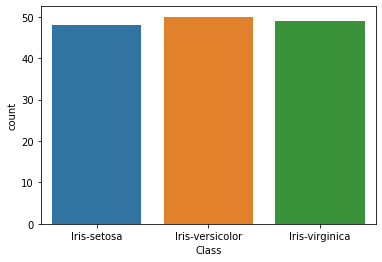

In [13]:
sns.countplot(data=data, x='Class')

In [14]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Class'] = encode.fit_transform(data.Class.values)

In [15]:
data['Class'].value_counts()

1    50
2    49
0    48
Name: Class, dtype: int64

In [16]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
X = data.drop(columns='Class')
y = data.Class

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=3, train_size=0.3)

In [27]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (44, 4)
xtest shape:  (103, 4)
ytrain shape:  (44,)
ytest shape:  (103,)


In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report

def select_model_predict(model):
    
    # Training the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #Checking Bias-variance tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(dataframe)
    
    # Classification Report for the model
    report = classification_report(ytest, ypred)
    print(report)
    
    return model

In [29]:
gnb = select_model_predict(GaussianNB())
mnb = select_model_predict(MultinomialNB())
bnb = select_model_predict(BernoulliNB())

                    Value
Train Accuracy  95.454545
Test Accuracy   96.116505
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.91      0.94        34
           2       0.92      0.97      0.94        34

    accuracy                           0.96       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.96      0.96      0.96       103

                    Value
Train Accuracy  90.909091
Test Accuracy   92.233010
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.81      1.00      0.89        34
           2       1.00      0.76      0.87        34

    accuracy                           0.92       103
   macro avg       0.94      0.92      0.92       103
weighted avg       0.94      0.92      0.92       103

                    Value
Train Accuracy  36.363636
Test Accuracy   33.009709
    